In [1]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import os  
from PIL import Image  
import re



In [2]:
pip install pillow


In [3]:
class TreeImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, image_name) for image_name in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):  
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  

        if self.transform:
            image = self.transform(image) 

        match = re.search(r'\d', os.path.basename(image_path))
        label_str = match.group() if match else '0'  
        label = int(label_str)

        return image, label


In [4]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

In [7]:
tree_dataset = TreeImageDataset(image_dir='tree1',transform=data_transform)
dataloader = DataLoader(tree_dataset, batch_size=32, shuffle=True)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


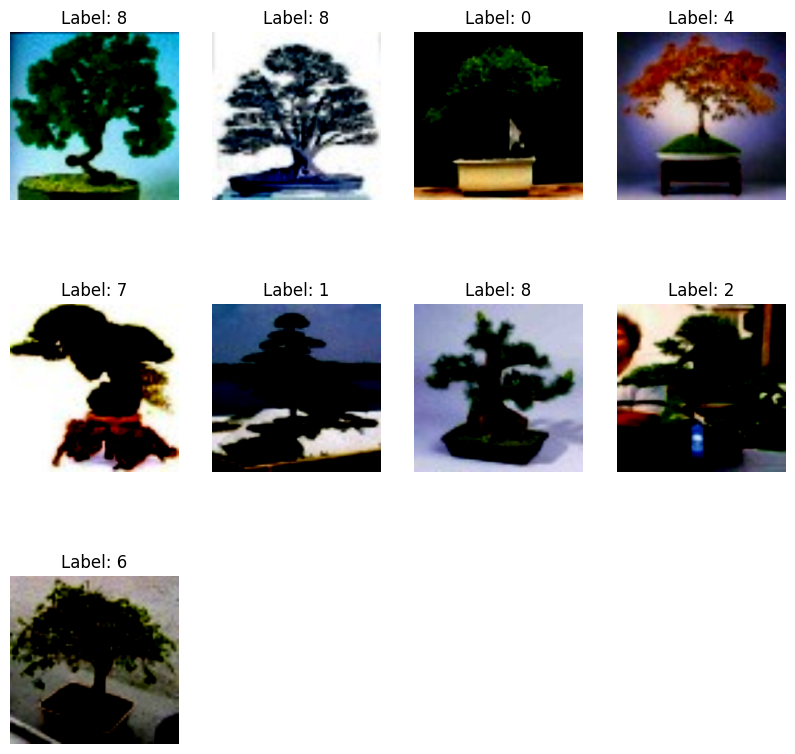

In [26]:
import matplotlib.pyplot as plt


images, labels = next(iter(dataloader))
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,4, i+1)
    plt.imshow(images[i].permute(1, 2,0)) 
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


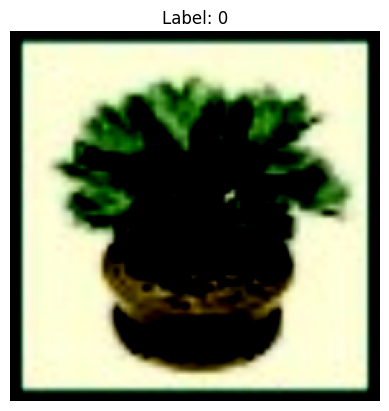

In [ ]:
index_to_display = 2
image_to_display, label_to_display = tree_dataset[index_to_display]

plt.imshow(image_to_display.permute(1, 2, 0))
plt.title(f"Label: {label_to_display}")
plt.axis('off')
plt.show()